In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [11]:
url = "http://www.hubertiming.com/results/2017GPTR10K"

html = urlopen(url)

In [12]:
#create BS obj from html by passing html to BS function()

soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [13]:
web_title = soup.title
print(web_title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [14]:
text = soup.get_text()
print(soup.text)








2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results






        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }
        #individualResults tbody tr {
            cursor: pointer;
        }
        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }
        .video-container iframe {
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
        }
        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }
        .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inline-block;
                min-width: 

In [15]:
links = soup.find_all('a')
for link in links:
    print(link.get('href'))


/results/2017GPTR
http://hubertiming.com/
#individual
#team
mailto:timing@hubertiming.com
#tabs-1
None
None
http://www.hubertiming.com/
http://facebook.com/hubertiming/


In [23]:
#print first 10 rows in url
rows = soup.find_all('tr')
print(rows[:10])

[<tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>00:36:21</td>
<td>05:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>00:00:03</td>
<td>00:36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:36:42</td>
<td>05:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>00:00:03</td>
<td>00:36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>00:37:44</td>
<td>06:05</td>
<td

In [24]:
#analyze the table :iterate thru all the cells in each row

for r in rows:
    cells_in_rows = r.find_all('td')
    print(cells_in_rows)
    

[<td>Finishers:</td>, <td>577</td>]
[<td>Male:</td>, <td>414</td>]
[<td>Female:</td>, <td>163</td>]
[]
[<td>1</td>, <td>814</td>, <td>JARED WILSON</td>, <td>M</td>, <td>TIGARD</td>, <td>OR</td>, <td>00:36:21</td>, <td>05:51</td>, <td>1 of 414</td>, <td>M 36-45</td>, <td>1 of 152</td>, <td>00:00:03</td>, <td>00:36:24</td>, <td></td>]
[<td>2</td>, <td>573</td>, <td>NATHAN A SUSTERSIC</td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>00:36:42</td>, <td>05:55</td>, <td>2 of 414</td>, <td>M 26-35</td>, <td>1 of 154</td>, <td>00:00:03</td>, <td>00:36:45</td>, <td>INTEL TEAM F</td>]
[<td>3</td>, <td>687</td>, <td>FRANCISCO MAYA</td>, <td>M</td>, <td>PORTLAND</td>, <td>OR</td>, <td>00:37:44</td>, <td>06:05</td>, <td>3 of 414</td>, <td>M 46-55</td>, <td>1 of 64</td>, <td>00:00:04</td>, <td>00:37:48</td>, <td></td>]
[<td>4</td>, <td>623</td>, <td>PAUL MORROW</td>, <td>M</td>, <td>BEAVERTON</td>, <td>OR</td>, <td>00:38:34</td>, <td>06:13</td>, <td>4 of 414</td>, <td>M 36-45</td>, <td>2 of 152

In [25]:
#remove the html tags by using get_text method to extract text without html tags

str_cells = str(cells_in_rows)
cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [29]:
#repeat the above : extract the text and append it to an empty list

list_rows = []

for r in rows:
    cells_in_rows = r.find_all('td')
    str_cells = str(cells_in_rows)
    cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
    list_rows.append(cleantext)
    print(cleantext)
    

[Finishers:, 577]
[Male:, 414]
[Female:, 163]
[]
[1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21, 05:51, 1 of 414, M 36-45, 1 of 152, 00:00:03, 00:36:24, ]
[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, 00:36:42, 05:55, 2 of 414, M 26-35, 1 of 154, 00:00:03, 00:36:45, INTEL TEAM F]
[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:37:44, 06:05, 3 of 414, M 46-55, 1 of 64, 00:00:04, 00:37:48, ]
[4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:34, 06:13, 4 of 414, M 36-45, 2 of 152, 00:00:03, 00:38:37, ]
[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00:39:21, 06:20, 5 of 414, M 26-35, 2 of 154, 00:00:03, 00:39:24, INTEL TEAM F]
[6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39:49, 06:25, 6 of 414, M 18-25, 1 of 34, 00:00:06, 00:39:55, ]
[7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 00:40:04, 06:27, 7 of 414, M 36-45, 3 of 152, 00:00:13, 00:40:17, ]
[8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, 00:40:05, 06:27, 8 of 414, M 36-45, 4 of 152, 00:00:04, 00:40:09, ]
[9, 7, BRANDON THOMAS, M, , , 00:40:17, 06:29

[189, 731, ROBERT HEUSSNER, M, PORTLAND, OR, 00:53:16, 08:35, 169 of 414, M 46-55, 30 of 64, 00:00:38, 00:53:54, ]
[190, 767, ROBERT EHLERT, M, PORTLAND, OR, 00:53:23, 08:36, 170 of 414, M 36-45, 65 of 152, 00:00:30, 00:53:53, ]
[191, 170, JAYCEE SLACK, F, BEAVERTON, OR, 00:53:26, 08:37, 21 of 163, F 18-25, 4 of 21, 00:00:34, 00:54:00, ]
[192, 610, YATHIN PISSAY, M, HILLSBORO, OR, 00:53:31, 08:38, 171 of 414, M 26-35, 54 of 154, 00:00:21, 00:53:52, ]
[193, 36, AJITHPRASADJAIN ADALAGEREJWALANNA, M, BEAVERTON, OR, 00:53:32, 08:38, 172 of 414, M 26-35, 55 of 154, 00:00:20, 00:53:52, ]
[194, 707, CANDICE L YUCA, F, BEAVERTON, OR, 00:53:33, 08:38, 22 of 163, F 36-45, 9 of 56, 00:00:31, 00:54:04, ]
[195, 763, THIERRY TAMBE, M, HILLSBORO, OR, 00:53:37, 08:38, 173 of 414, M 26-35, 56 of 154, 00:00:38, 00:54:15, ]
[196, 817, ERIC GREGORY, M, PORTLAND, OR, 00:53:44, 08:40, 174 of 414, M 46-55, 31 of 64, 00:01:01, 00:54:45, ]
[197, 881, MICHELLE G DINSMOOR, F, PORTLAND, OR, 00:53:45, 08:40, 23 of

[305, 578, DAVID J DESROCHER, M, PORTLAND, OR, 00:59:53, 09:39, 254 of 414, M 36-45, 92 of 152, 00:00:50, 01:00:43, ]
[306, 71, CHRISTINA HUNTER, F, BEAVERTON, OR, 00:59:55, 09:39, 52 of 163, F 46-55, 10 of 22, 00:00:14, 01:00:09, ]
[307, 716, PRASANNA A GOWDA, M, PORTLAND, OR, 01:00:01, 09:40, 255 of 414, M 36-45, 93 of 152, 00:01:06, 01:01:07, ]
[308, 269, STANSLAUS W MWAKALEBELA, M, PORTLAND, OR, 01:00:03, 09:41, 256 of 414, M 36-45, 94 of 152, 00:01:14, 01:01:17, ]
[309, 640, ANIL KAZA, M, HILLSBORO, OR, 01:00:12, 09:42, 257 of 414, M 36-45, 95 of 152, 00:00:29, 01:00:41, ]
[310, 561, MARIA PATLA, F, FOREST GROVE, OR, 01:00:12, 09:42, 53 of 163, F 36-45, 18 of 56, 00:00:37, 01:00:49, ]
[311, 747, LAWRENCE HEYWOOD, M, PORTLAND, OR, 01:00:13, 09:42, 258 of 414, M 46-55, 50 of 64, 00:00:55, 01:01:08, ]
[312, 718, SETH PATLA, M, NOT SPECIFIED, OR, 01:00:13, 09:42, 259 of 414, M 36-45, 96 of 152, 00:00:38, 01:00:51, ]
[313, 163, ALEXIS GREGERSON, F, PORTLAND, OR, 01:00:18, 09:43, 54 of 

[522, 235, EMILY RALSTON, F, HILLSBORO, OR, 01:14:22, 11:59, 133 of 163, F 26-35, 50 of 59, 00:01:20, 01:15:42, ]
[523, 154, DAVID W MENDIES, M, HILLSBORO, OR, 01:14:32, 12:01, 390 of 414, M 36-45, 143 of 152, 00:00:37, 01:15:09, INTEL TEAM H]
[524, 295, BRUCE CHHUON, M, OTHER, OR, 01:14:40, 12:02, 391 of 414, M 26-35, 143 of 154, 00:01:11, 01:15:51, ]
[525, 680, LUIS F CEPEDA, M, PORTLAND, OR, 01:14:54, 12:04, 392 of 414, M 36-45, 144 of 152, 00:01:14, 01:16:08, ]
[526, 20, SAYALI KULKARNI, F, PORTLAND, OR, 01:15:13, 12:07, 134 of 163, F 26-35, 51 of 59, 00:00:16, 01:15:29, ]
[527, 440, VIVEK R DESHPANDE, M, HILLSBORO, OR, 01:15:34, 12:11, 393 of 414, M 26-35, 144 of 154, 00:00:28, 01:16:02, ]
[528, 639, RAYMOND NAZARIO, M, HILLSBORO, OR, 01:15:38, 12:11, 394 of 414, M 26-35, 145 of 154, 00:00:44, 01:16:22, ]
[529, 879, HOLLI K SHENFIELD, F, PORTLAND, OR, 01:15:48, 12:13, 135 of 163, F 36-45, 42 of 56, 00:01:10, 01:16:58, ]
[530, 864, AUDREY SCHAAB, F, BEAVERTON, OR, 01:15:51, 12:14, 

In [30]:
#convert the list into a dataframe

df = pd.DataFrame(list_rows)
print(df)

                                                     0
0                                    [Finishers:, 577]
1                                         [Male:, 414]
2                                       [Female:, 163]
3                                                   []
4    [1, 814, JARED WILSON, M, TIGARD, OR, 00:36:21...
5    [2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ...
6    [3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 00:3...
7    [4, 623, PAUL MORROW, M, BEAVERTON, OR, 00:38:...
8    [5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 00...
9    [6, 642, JONATHON TRAN, M, PORTLAND, OR, 00:39...
10   [7, 144, GEORGE TOTONCHY, M, PORTLAND, OR, 00:...
11   [8, 395, BENJAMIN C CHAFFIN, M, PORTLAND, OR, ...
12   [9, 7, BRANDON THOMAS, M, , , 00:40:17, 06:29,...
13   [10, 3, ERIK BJORNSTAD, M, , , 00:40:21, 06:30...
14   [11, 68, WITALI SPULING, M, PORTLAND, OR, 00:4...
15   [12, 788, ANDY WEDAM, M, PORTLAND, OR, 00:40:3...
16   [13, 729, MICHAEL P GEORGE, M, PORTLAND, OR, 0...
17   [14, 

In [32]:
#clean up the dataframe from column 0 using (,) delimiter and str.split() method

df_clean = df[0].str.split(',', expand = True)
print (df_clean)

              0                 1                         2   \
0    [Finishers:              577]                      None   
1         [Male:              414]                      None   
2       [Female:              163]                      None   
3             []              None                      None   
4             [1               814              JARED WILSON   
5             [2               573        NATHAN A SUSTERSIC   
6             [3               687            FRANCISCO MAYA   
7             [4               623               PAUL MORROW   
8             [5               569           DEREK G OSBORNE   
9             [6               642             JONATHON TRAN   
10            [7               144           GEORGE TOTONCHY   
11            [8               395        BENJAMIN C CHAFFIN   
12            [9                 7            BRANDON THOMAS   
13           [10                 3            ERIK BJORNSTAD   
14           [11                68      

In [35]:
#remove the opening square bracket from column 0

df_clean[0] = df_clean[0].str.strip('[')
print(df_clean)

             0                 1                         2   \
0    Finishers:              577]                      None   
1         Male:              414]                      None   
2       Female:              163]                      None   
3             ]              None                      None   
4             1               814              JARED WILSON   
5             2               573        NATHAN A SUSTERSIC   
6             3               687            FRANCISCO MAYA   
7             4               623               PAUL MORROW   
8             5               569           DEREK G OSBORNE   
9             6               642             JONATHON TRAN   
10            7               144           GEORGE TOTONCHY   
11            8               395        BENJAMIN C CHAFFIN   
12            9                 7            BRANDON THOMAS   
13           10                 3            ERIK BJORNSTAD   
14           11                68            WITALI SPU

In [37]:
#table is missing header info. Using the find_all method, find table_headers

table_header = soup.find_all('th')
print(table_header)

[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Chip Time</th>, <th>Chip Pace</th>, <th>Gender Place</th>, <th>Age Group</th>, <th>Age Group Place</th>, <th>Time to Start</th>, <th>Gun Time</th>, <th>Team</th>]


In [38]:
#extract text from header and append it to an empty list

list_header = []
str_table_header = str(table_header)
cleantext_header = BeautifulSoup(str_table_header, 'lxml').get_text()
list_header.append(cleantext_header)
print(list_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [39]:
#similar to table rows, convert the list into pandas df

df_header = pd.DataFrame(list_header)
print(df_header)

                                                   0
0  [Place, Bib, Name, Gender, City, State, Chip T...


In [40]:
df_header_clean = df_header[0].str.split(',', expand = True)
print (df_header_clean)

       0     1      2        3      4       5           6           7   \
0  [Place   Bib   Name   Gender   City   State   Chip Time   Chip Pace   

              8           9                 10              11         12  \
0   Gender Place   Age Group   Age Group Place   Time to Start   Gun Time   

       13  
0   Team]  


In [42]:
#concat the 2 dataframes into 1

frames = [df_header_clean, df_clean]
new_df = pd.concat(frames)
print(new_df.head(10))

           0      1                    2        3           4       5   \
0      [Place    Bib                 Name   Gender        City   State   
0  Finishers:   577]                 None     None        None    None   
1       Male:   414]                 None     None        None    None   
2     Female:   163]                 None     None        None    None   
3           ]   None                 None     None        None    None   
4           1    814         JARED WILSON        M      TIGARD      OR   
5           2    573   NATHAN A SUSTERSIC        M    PORTLAND      OR   
6           3    687       FRANCISCO MAYA        M    PORTLAND      OR   
7           4    623          PAUL MORROW        M   BEAVERTON      OR   
8           5    569      DEREK G OSBORNE        M   HILLSBORO      OR   

           6           7              8           9                 10  \
0   Chip Time   Chip Pace   Gender Place   Age Group   Age Group Place   
0        None        None           N

In [48]:
#assign first_row to be table header
new_df_assign_header = new_df.rename(columns=new_df.iloc[0])
print(new_df_assign_header.head(10))

       [Place    Bib                 Name   Gender        City   State  \
0      [Place    Bib                 Name   Gender        City   State   
0  Finishers:   577]                 None     None        None    None   
1       Male:   414]                 None     None        None    None   
2     Female:   163]                 None     None        None    None   
3           ]   None                 None     None        None    None   
4           1    814         JARED WILSON        M      TIGARD      OR   
5           2    573   NATHAN A SUSTERSIC        M    PORTLAND      OR   
6           3    687       FRANCISCO MAYA        M    PORTLAND      OR   
7           4    623          PAUL MORROW        M   BEAVERTON      OR   
8           5    569      DEREK G OSBORNE        M   HILLSBORO      OR   

    Chip Time   Chip Pace   Gender Place   Age Group   Age Group Place  \
0   Chip Time   Chip Pace   Gender Place   Age Group   Age Group Place   
0        None        None           N

In [49]:
#get an overview of the data
new_df_assign_header.info()
new_df_assign_header.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 595
Data columns (total 14 columns):
[Place              597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.0+ KB


(597, 14)

In [51]:
new_df_cleaned = new_df_assign_header.dropna(axis=0, how = 'any')
print(new_df_cleaned.head(10))

    [Place   Bib                 Name   Gender        City   State  \
0   [Place   Bib                 Name   Gender        City   State   
4        1   814         JARED WILSON        M      TIGARD      OR   
5        2   573   NATHAN A SUSTERSIC        M    PORTLAND      OR   
6        3   687       FRANCISCO MAYA        M    PORTLAND      OR   
7        4   623          PAUL MORROW        M   BEAVERTON      OR   
8        5   569      DEREK G OSBORNE        M   HILLSBORO      OR   
9        6   642        JONATHON TRAN        M    PORTLAND      OR   
10       7   144      GEORGE TOTONCHY        M    PORTLAND      OR   
11       8   395   BENJAMIN C CHAFFIN        M    PORTLAND      OR   
12       9     7       BRANDON THOMAS        M                       

     Chip Time   Chip Pace   Gender Place   Age Group   Age Group Place  \
0    Chip Time   Chip Pace   Gender Place   Age Group   Age Group Place   
4     00:36:21       05:51       1 of 414     M 36-45          1 of 152   
5   

In [52]:
#drop header since it is repeated twice

new_df_cleaned_2 = new_df_cleaned.drop(new_df_cleaned.index[0])
print(new_df_cleaned_2.head(10))

   [Place   Bib                 Name  Gender        City  State  Chip Time  \
4       1   814         JARED WILSON       M      TIGARD     OR   00:36:21   
5       2   573   NATHAN A SUSTERSIC       M    PORTLAND     OR   00:36:42   
6       3   687       FRANCISCO MAYA       M    PORTLAND     OR   00:37:44   
7       4   623          PAUL MORROW       M   BEAVERTON     OR   00:38:34   
8       5   569      DEREK G OSBORNE       M   HILLSBORO     OR   00:39:21   
9       6   642        JONATHON TRAN       M    PORTLAND     OR   00:39:49   
10      7   144      GEORGE TOTONCHY       M    PORTLAND     OR   00:40:04   
11      8   395   BENJAMIN C CHAFFIN       M    PORTLAND     OR   00:40:05   
12      9     7       BRANDON THOMAS       M                      00:40:17   
13     10     3       ERIK BJORNSTAD       M                      00:40:21   

    Chip Pace  Gender Place  Age Group  Age Group Place  Time to Start  \
4       05:51      1 of 414    M 36-45         1 of 152       00:00

In [54]:
#rename place and team column cos of open brackets

new_df_cleaned_2.rename(columns={'[Place' : 'Place'}, inplace=True)
new_df_cleaned_2.rename(columns={' Team]' : 'Team'}, inplace = True)
print(new_df_cleaned_2.head(10))

   Place   Bib                 Name  Gender        City  State  Chip Time  \
4      1   814         JARED WILSON       M      TIGARD     OR   00:36:21   
5      2   573   NATHAN A SUSTERSIC       M    PORTLAND     OR   00:36:42   
6      3   687       FRANCISCO MAYA       M    PORTLAND     OR   00:37:44   
7      4   623          PAUL MORROW       M   BEAVERTON     OR   00:38:34   
8      5   569      DEREK G OSBORNE       M   HILLSBORO     OR   00:39:21   
9      6   642        JONATHON TRAN       M    PORTLAND     OR   00:39:49   
10     7   144      GEORGE TOTONCHY       M    PORTLAND     OR   00:40:04   
11     8   395   BENJAMIN C CHAFFIN       M    PORTLAND     OR   00:40:05   
12     9     7       BRANDON THOMAS       M                      00:40:17   
13    10     3       ERIK BJORNSTAD       M                      00:40:21   

    Chip Pace  Gender Place  Age Group  Age Group Place  Time to Start  \
4       05:51      1 of 414    M 36-45         1 of 152       00:00:03   
5   

In [56]:
#strip off the closing bracket from last column team rows
new_df_cleaned_2['Team'] = new_df_cleaned_2['Team'].str.strip(']')
print(new_df_cleaned_2.head(10))

   Place   Bib                 Name  Gender        City  State  Chip Time  \
4      1   814         JARED WILSON       M      TIGARD     OR   00:36:21   
5      2   573   NATHAN A SUSTERSIC       M    PORTLAND     OR   00:36:42   
6      3   687       FRANCISCO MAYA       M    PORTLAND     OR   00:37:44   
7      4   623          PAUL MORROW       M   BEAVERTON     OR   00:38:34   
8      5   569      DEREK G OSBORNE       M   HILLSBORO     OR   00:39:21   
9      6   642        JONATHON TRAN       M    PORTLAND     OR   00:39:49   
10     7   144      GEORGE TOTONCHY       M    PORTLAND     OR   00:40:04   
11     8   395   BENJAMIN C CHAFFIN       M    PORTLAND     OR   00:40:05   
12     9     7       BRANDON THOMAS       M                      00:40:17   
13    10     3       ERIK BJORNSTAD       M                      00:40:21   

    Chip Pace  Gender Place  Age Group  Age Group Place  Time to Start  \
4       05:51      1 of 414    M 36-45         1 of 152       00:00:03   
5   

In [58]:
#make a new column for chip time in mins
time_list = new_df_cleaned_2[' Chip Time'].tolist()

#create an empty array
time_mins = []
for i in time_list:
    h,m,s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
    

In [59]:
#convert the list into a dataframe 
new_df_cleaned_2['Runner Mins'] = time_mins

print(new_df_cleaned_2.head(10))

   Place   Bib                 Name  Gender        City  State  Chip Time  \
4      1   814         JARED WILSON       M      TIGARD     OR   00:36:21   
5      2   573   NATHAN A SUSTERSIC       M    PORTLAND     OR   00:36:42   
6      3   687       FRANCISCO MAYA       M    PORTLAND     OR   00:37:44   
7      4   623          PAUL MORROW       M   BEAVERTON     OR   00:38:34   
8      5   569      DEREK G OSBORNE       M   HILLSBORO     OR   00:39:21   
9      6   642        JONATHON TRAN       M    PORTLAND     OR   00:39:49   
10     7   144      GEORGE TOTONCHY       M    PORTLAND     OR   00:40:04   
11     8   395   BENJAMIN C CHAFFIN       M    PORTLAND     OR   00:40:05   
12     9     7       BRANDON THOMAS       M                      00:40:17   
13    10     3       ERIK BJORNSTAD       M                      00:40:21   

    Chip Pace  Gender Place  Age Group  Age Group Place  Time to Start  \
4       05:51      1 of 414    M 36-45         1 of 152       00:00:03   
5   

In [64]:
#calculate the statistics for numeric columns only
new_df_cleaned_2.describe(include=[np.number])

,Runner Mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


In [66]:
#calculate statistics but group by gender this time

gender_statistics = new_df_cleaned_2.groupby(' Gender', as_index=True).describe()
print(gender_statistics)

        Runner Mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


C:\Users\michelle\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


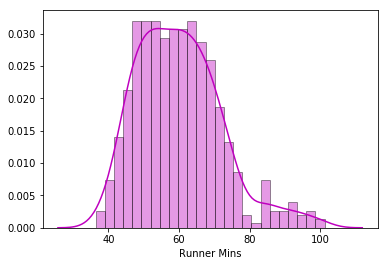

In [61]:
# check graph if runner's time follwed a normal distribution or not

x = new_df_cleaned_2['Runner Mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()


C:\Users\michelle\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


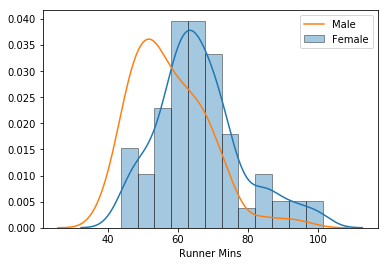

In [63]:
#check for performance diff btw males & females

females = new_df_cleaned_2.loc[new_df_cleaned_2[' Gender']==' F']['Runner Mins']
males = new_df_cleaned_2.loc[new_df_cleaned_2[' Gender']==' M']['Runner Mins']
sns.distplot(females, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(males, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()